In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Imagine a building that uses a complex energy consumption system to regulate its temperature and lighting. The energy consumption system has several variables that affect its efficiency, such as the temperature setpoint, lighting levels, and ventilation rates. The function J(x) = x2 - 4x + 3 can be seen as a simplified model of the efficiency of the energy consumption system, where x represents one of the variables that affect the system's efficiency. For example, x could represent the temperature setpoint. By adjusting the value of x using Gradient Descent, the building managers can find the optimal temperature setpoint that would minimize the value of the cost function and result in the most efficient energy consumption system. This optimization would result in lower energy consumption costs and reduced carbon emissions, while still maintaining a comfortable environment for the building occupants. You will be implementing the Gradient Descent algorithm to find the minimum of the quadratic cost function.



Background
Gradient Descent is an iterative optimization algorithm that is commonly used to minimize a cost function by adjusting the parameters of a model. The algorithm works by iteratively updating the parameters in the opposite direction of the gradient of the cost function. The learning rate determines the size of the step taken in the opposite direction of the gradient.

## 1

In [ ]:
# Q1) Implement the following function:

def gradient_descent_1(J, x, alpha, num_iters):

    """

    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:

    x -- initial parameter value (scalar)

    alpha -- learning rate (scalar)

    num_iters -- the number of iterations to run Gradient Descent (scalar)

    Returns:

    x_final -- optimized parameter value

    J_history -- vector of cost function values for each iteration (num_iters x 1)

    """

    x_history, J_history, iters = [], [], []
    for i in range(num_iters):

      # iters
      iters.append(i+1)

      # store J and x
      J_history.append(J(x))
      x_history.append(x)

      # compute gradient
      grad = 2*x - 4

      if i < (num_iters - 1):
        # update x
        x -= alpha * grad

    x_history = np.array(x_history)
    J_history = np.array(J_history)
    iters = np.array(iters)

    return iters, x_history, J_history

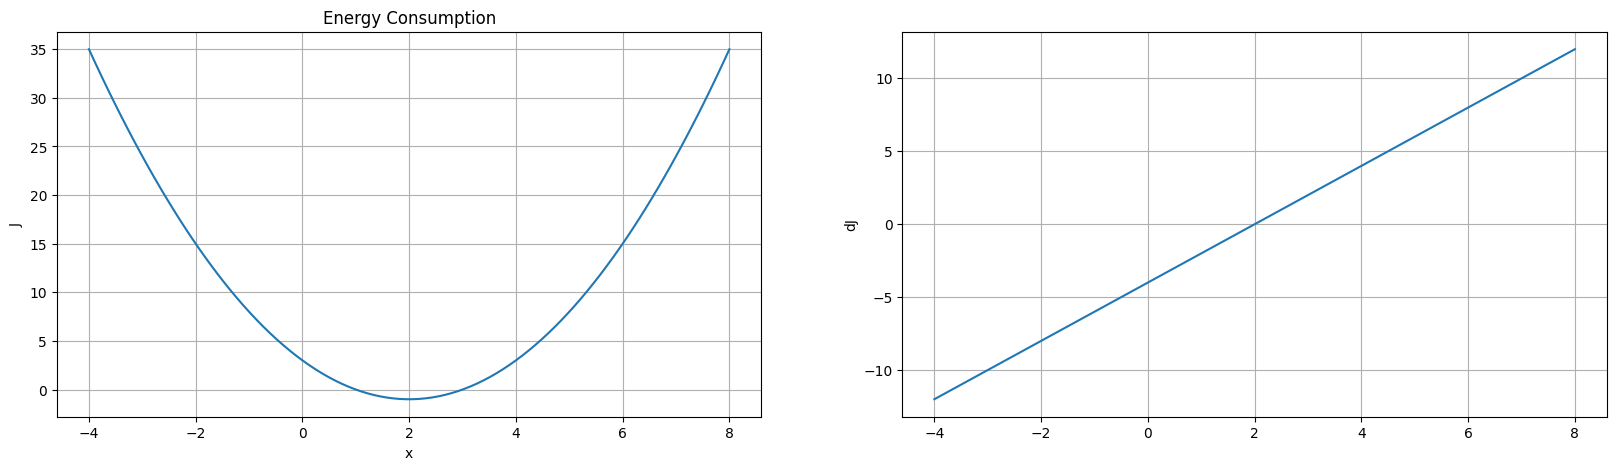

In [ ]:
J = lambda x: x**2 - 4*x +3
dJ = lambda x: 2*x - 4

x = np.linspace(-4, 8, 100)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(x, list(map(J, x)))
ax[0].grid()
ax[0].set_xlabel('x')
ax[0].set_ylabel('J')
ax[0].set_title('Energy Consumption')

ax[1]
ax[1].plot(x, list(map(dJ, x)))
ax[1].grid()
ax[1].set_ylabel('dJ') ;

In [ ]:
iters, x_history, J_history = gradient_descent_1(J = J, x = -4, alpha = .01, num_iters = 1000)

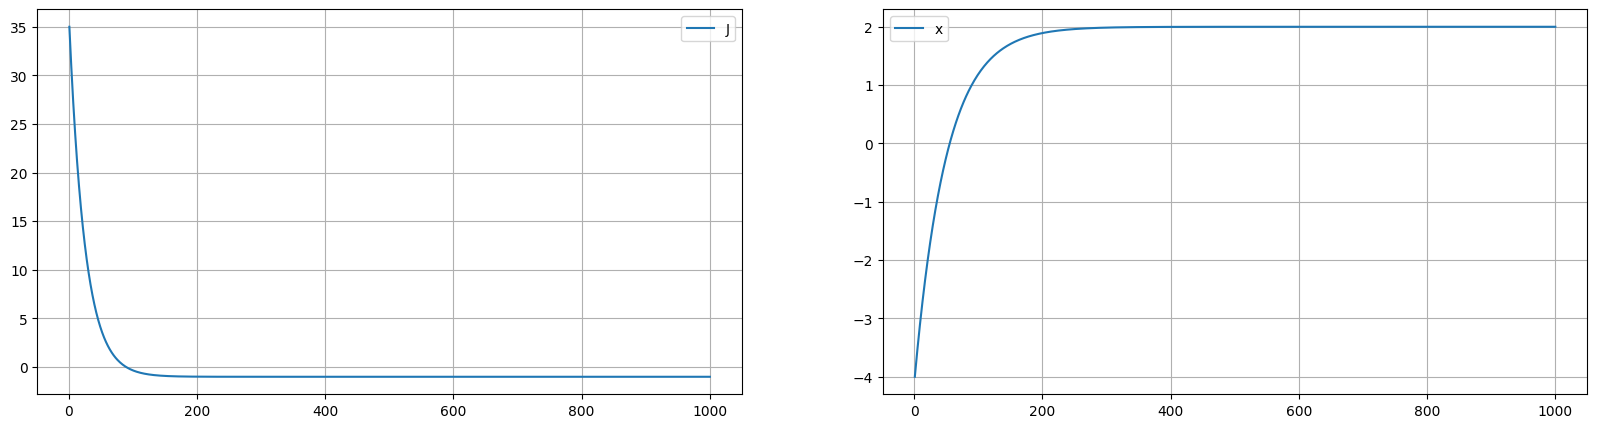

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(iters, J_history, label = 'J')
ax[0].grid()
ax[0].legend()

ax[1].plot(iters, x_history, label = 'x')
ax[1].grid()
ax[1].legend() ;

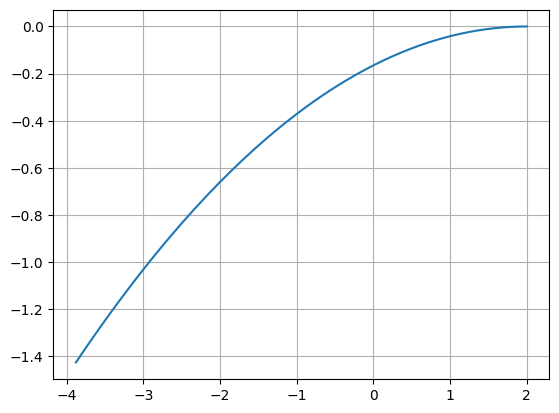

In [ ]:
plt.plot(x_history[1:], np.diff(J_history))
plt.grid()

## 2

Implementing different convergence criteria: Convergence criteria for gradient descent refers to the condition under which the algorithm is considered to have found an acceptable solution. There are several common convergence criteria for gradient descent, including,



a) Maximum number of iterations: In the previous code, you have limited the number of iterations that the algorithm will perform. The algorithm stops after a fixed number of iterations, regardless of the change in the objective function.



b) Minimum change in objective function: The algorithm can also be stopped when the change in the objective function between consecutive iterations falls below a certain threshold (called tolerance), indicating that the algorithm has converged to a preferred minimum. In other words, we need some minimum improvement in the objective function value between consecutive iterations that is considered significant enough to continue the optimization process. It is often specified as a small positive number, such as 1e-3 or 1e-6.



Choosing an appropriate tolerance value depends on the problem being solved and the computational resources available. A smaller tolerance value can lead to a more accurate solution but may require more iterations to achieve convergence, while a larger tolerance value can result in faster convergence but may not produce as accurate a solution. It is important to balance accuracy with computational efficiency when selecting a tolerance value for gradient descent.

In [ ]:
# Implement the following function:

def gradient_descent_2(J, dJ, x, alpha, tol, max_iters, patience = 1):

    """

    Performs gradient descent to minimize the objective function J.

    Arguments:

    J -- objective function to be minimized

    dJ -- gradient of the objective function

    x -- initial guess for the solution

    alpha -- learning rate

    tol -- tolerance for convergence

    max_iters -- maximum number of iterations to perform

    Returns:

    x -- solution to the optimization problem

    """

    x_history, J_history, dJ_history, iters = [], [], [], []
    for i in range(max_iters):

      # iters
      iters.append(i+1)

      # store J and x
      J_history.append(J(x))
      dJ_history.append(dJ(x))

      x_history.append(x)

      # compute gradient
      grad = 2*x - 4

      if i < (max_iters - 1):
        # update x
        x -= alpha * grad

      if (i > patience) & all(np.abs(np.diff(np.array(J_history[-(patience+1):]))) <= tol):

        print(f"Stopped training early at iteration {i+1}.")

        break


    x_history = np.array(x_history)
    J_history = np.array(J_history)
    iters = np.array(iters)

    return iters, x_history, J_history, dJ_history

In [ ]:
iters, x_history, J_history, dJ_history = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

Stopped training early at iteration 167.


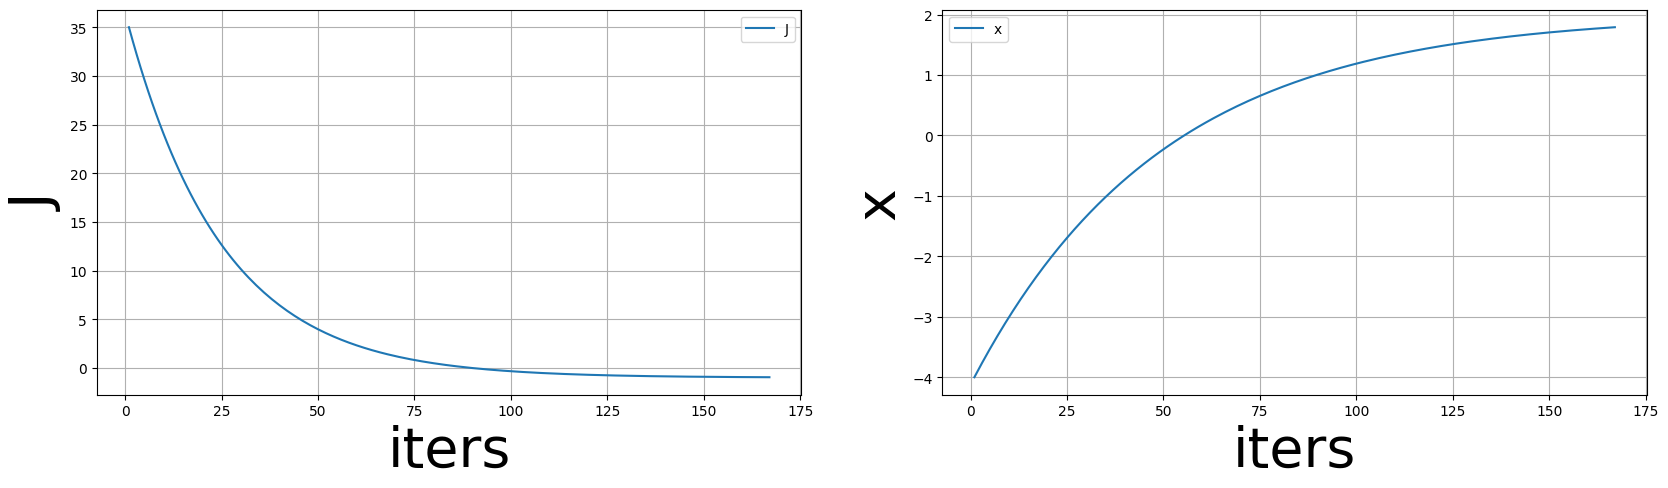

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(iters, J_history, label = 'J')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('J', fontsize = 40)
ax[0].set_xlabel('iters', fontsize = 40)

ax[1].plot(iters, x_history, label = 'x')
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel('x', fontsize = 40)
ax[1].set_xlabel('iters', fontsize = 40) ;

In [ ]:
J = CrossEntropy

J(sample_1: image --> cat)

In [ ]:
1) Batch GD (All samples, avg)
2) Stochastic GD (one random sample)
* 3) Mini-batch GD (M sample, avg)

In [ ]:
J(x1), J(x2), ...J(x23)... J() ... avg()

In [ ]:
sample_1 = (image_1, lable_1[dog, cat])
....
sample_1 = (image_1, lable_1[dog, cat])

In [ ]:
from matplotlib import scale
"Tensor"

0th Tensor = scale
1th Tensor = vector
2nd Tensor = matrix
3rd Tesnors = hyperplane

In [ ]:
import torch

In [ ]:
x = np.array([[1,2,3], [4, 5, 6], [7,8,9]])

t = torch.tensor(x)

## 3

The initial values of the parameter (x) can have a significant impact on the performance of the algorithm. If the initial value is too large or too small, the algorithm may converge to a suboptimal solution in the given iterations.



Initialize the parameters with different values to study the impact of different initializations on the performance of Gradient Descent. You can use the above code to compare the performance of the different initializations in terms of convergence time.



Select the initialization that gives the best result and use it for further experiments.

In [ ]:
iters_1, x_history_1, J_history_1, dJ_history_1 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_2, x_history_2, J_history_2, dJ_history_2 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -2,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_3, x_history_3, J_history_3, dJ_history_3 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = 0,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_4, x_history_4, J_history_4, dJ_history_4 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = 4,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_5, x_history_5, J_history_5, dJ_history_5 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = 8,
                                                                     alpha = .01,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1)

Stopped training early at iteration 167.
Stopped training early at iteration 147.
Stopped training early at iteration 113.
Stopped training early at iteration 113.
Stopped training early at iteration 167.


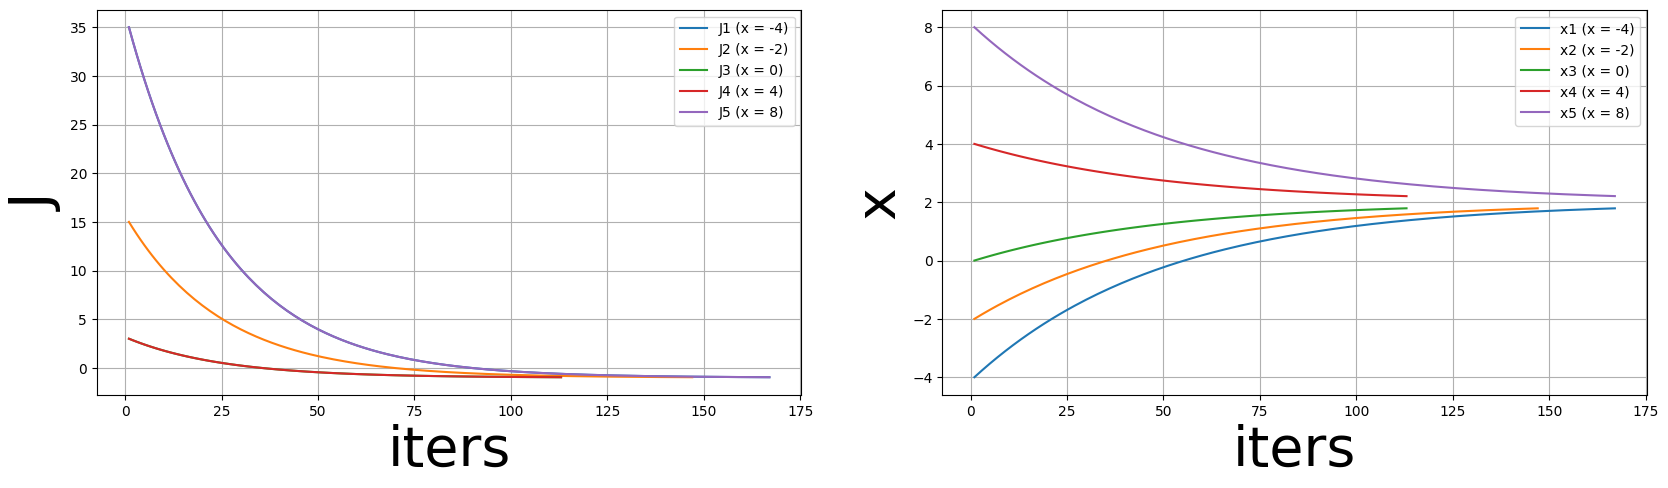

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(iters_1, J_history_1, label = 'J1 (x = -4)')
ax[0].plot(iters_2, J_history_2, label = 'J2 (x = -2)')
ax[0].plot(iters_3, J_history_3, label = 'J3 (x = 0)')
ax[0].plot(iters_4, J_history_4, label = 'J4 (x = 4)')
ax[0].plot(iters_5, J_history_5, label = 'J5 (x = 8)')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('J', fontsize = 40)
ax[0].set_xlabel('iters', fontsize = 40)

ax[1].plot(iters_1, x_history_1, label = 'x1 (x = -4)')
ax[1].plot(iters_2, x_history_2, label = 'x2 (x = -2)')
ax[1].plot(iters_3, x_history_3, label = 'x3 (x = 0)')
ax[1].plot(iters_4, x_history_4, label = 'x4 (x = 4)')
ax[1].plot(iters_5, x_history_5, label = 'x5 (x = 8)')
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel('x', fontsize = 40)
ax[1].set_xlabel('iters', fontsize = 40) ;

## 4

The learning rate is a crucial hyperparameter in Gradient Descent that determines the size of the step taken in the opposite direction of the gradient. If the learning rate is too small, the algorithm will take a long time to converge to the minimum. If the learning rate is too large, the algorithm may overshoot the minimum and diverge. Experiment with different learning rates and plot the cost function values over the iterations to visualize the convergence.

In [ ]:
iters_1, x_history_1, J_history_1, dJ_history_1 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .01,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_2, x_history_2, J_history_2, dJ_history_2 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .05,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_3, x_history_3, J_history_3, dJ_history_3 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .1,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_4, x_history_4, J_history_4, dJ_history_4 = gradient_descent_2(J = J,
                                                            dJ = dJ,
                                                            x = -4,
                                                            alpha = .5,
                                                            max_iters = 1000,
                                                            patience = 100,
                                                            tol = .1)

iters_5, x_history_5, J_history_5, dJ_history_5 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = -4,
                                                                     alpha = .75,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1)

iters_6, x_history_6, J_history_6, dJ_history_6 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = -4,
                                                                     alpha = 0.95,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1)

Stopped training early at iteration 167.
Stopped training early at iteration 122.
Stopped training early at iteration 112.
Stopped training early at iteration 102.
Stopped training early at iteration 106.
Stopped training early at iteration 122.


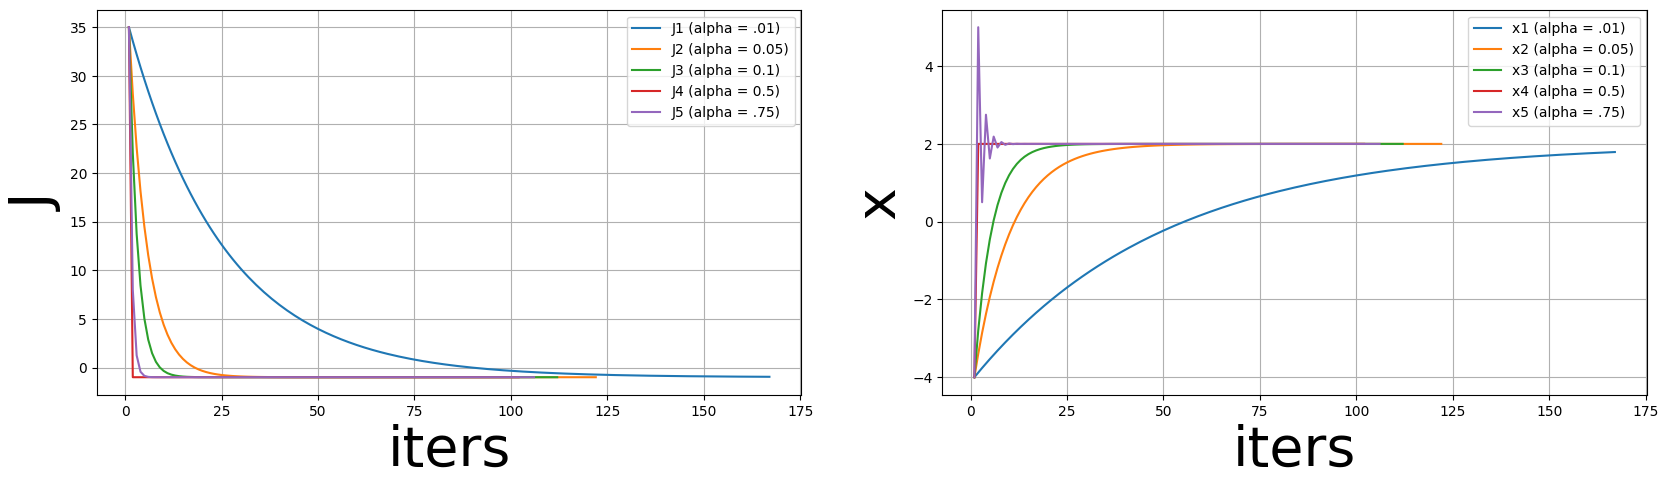

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(iters_1, J_history_1, label = 'J1 (alpha = .01)')
ax[0].plot(iters_2, J_history_2, label = 'J2 (alpha = 0.05)')
ax[0].plot(iters_3, J_history_3, label = 'J3 (alpha = 0.1)')
ax[0].plot(iters_4, J_history_4, label = 'J4 (alpha = 0.5)')
ax[0].plot(iters_5, J_history_5, label = 'J5 (alpha = .75)')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('J', fontsize = 40)
ax[0].set_xlabel('iters', fontsize = 40)

ax[1].plot(iters_1, x_history_1, label = 'x1 (alpha = .01)')
ax[1].plot(iters_2, x_history_2, label = 'x2 (alpha = 0.05)')
ax[1].plot(iters_3, x_history_3, label = 'x3 (alpha = 0.1)')
ax[1].plot(iters_4, x_history_4, label = 'x4 (alpha = 0.5)')
ax[1].plot(iters_5, x_history_5, label = 'x5 (alpha = .75)')
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel('x', fontsize = 40)
ax[1].set_xlabel('iters', fontsize = 40) ;

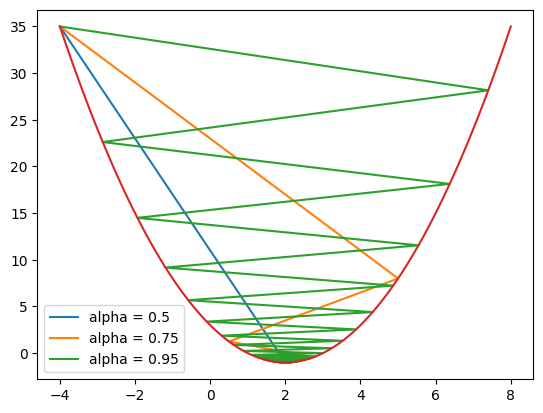

In [ ]:
# plt.plot(x_history_1, J_history_1)
# plt.plot(x_history_2, J_history_2)
# plt.plot(x_history_3, J_history_3, label = 'alpha = 0.1')
plt.plot(x_history_4, J_history_4, label = 'alpha = 0.5')
plt.plot(x_history_5, J_history_5, label = 'alpha = 0.75')
plt.plot(x_history_6, J_history_6, label = 'alpha = 0.95')
plt.plot(x, J(x)) # list(map(J, x)))
plt.legend()

## 5

So far, you had a ‘constant’ learning rate (alpha). Two popular learning strategies for adapting the learning rate during training are invscaling and adaptive learning rate. You will be implementing these two strategies



The invscaling strategy decreases the learning rate over time according to a schedule. A common schedule is to divide the learning rate by the square root of the iteration number:
alpha = alpha0 / sqrt(t)



where alpha0 is the initial learning rate and t is the iteration number. This strategy is based on the intuition that as the algorithm approaches the minimum, the step size should become smaller to avoid overshooting it.



The adaptive learning rate strategy is a form of learning rate annealing or decay, where the learning rate is reduced to prevent overshooting and oscillations. One common approach is to decrease the learning rate by a factor, such as dividing it by 5 or 10 if overshooting occurs. The change in the sign of the gradient will indicate overshooting during optimization.

In [ ]:
# Implement the following function:

def gradient_descent_2(J, dJ, x, alpha0, tol, max_iters, patience = 1,
                       strategy = None, alpha_factor = 1):

    """

    Performs gradient descent to minimize the objective function J.

    Arguments:

    J -- objective function to be minimized

    dJ -- gradient of the objective function

    x -- initial guess for the solution

    alpha -- learning rate

    tol -- tolerance for convergence

    max_iters -- maximum number of iterations to perform

    Returns:

    x -- solution to the optimization problem

    """

    alpha = alpha0

    x_history, J_history, dJ_history, iters = [], [], [], []
    for i in range(max_iters):

      # iters
      iters.append(i+1)

      # store J and x
      J_history.append(J(x))
      dJ_history.append(dJ(x))

      x_history.append(x)

      # compute gradient
      grad = 2*x - 4

      if i < (max_iters - 1):

        if strategy == 'invscaling':
          alpha = alpha0/np.sqrt(i+1)
        elif strategy == 'adaptive':
          alpha /= alpha_factor
        # elif the past 20 changes in J are all > tol_2, then reduce the learning by something

        # update x
        x -= alpha * grad

      if (i > patience) & all(np.abs(np.diff(np.array(J_history[-(patience+1):]))) <= tol):

        print(f"Stopped training early at iteration {i+1}.")

        break

    x_history = np.array(x_history)
    J_history = np.array(J_history)
    iters = np.array(iters)

    return iters, x_history, J_history, dJ_history

In [ ]:
iters_1, x_history_1, J_history_1, dJ_history_1 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = -4,
                                                                     alpha0 = .9,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1)

iters_2, x_history_2, J_history_2, dJ_history_2 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = -4,
                                                                     alpha0 = .9,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1,
                                                                     strategy = 'invscaling')

iters_3, x_history_3, J_history_3, dJ_history_3 = gradient_descent_2(J = J,
                                                                     dJ = dJ,
                                                                     x = -4,
                                                                     alpha0 = .9,
                                                                     max_iters = 1000,
                                                                     patience = 100,
                                                                     tol = .1,
                                                                     strategy = 'adaptive',
                                                                     alpha_factor = 1.5)

Stopped training early at iteration 112.
Stopped training early at iteration 104.
Stopped training early at iteration 103.


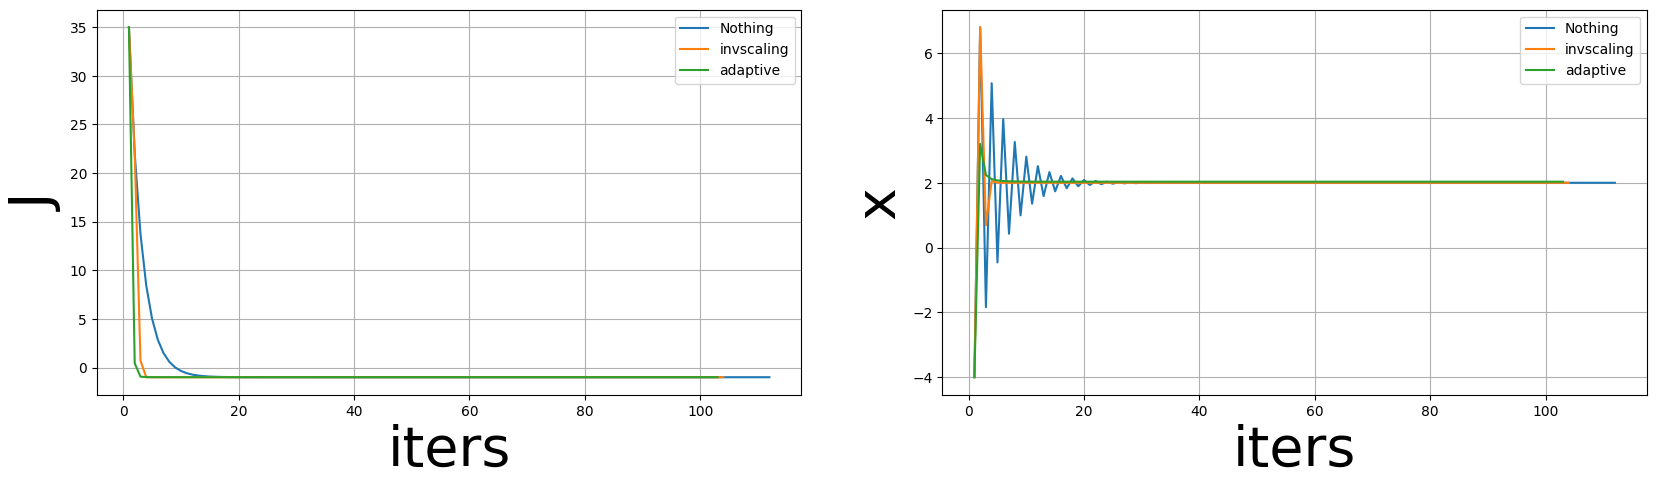

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(iters_1, J_history_1, label = 'Nothing')
ax[0].plot(iters_2, J_history_2, label = 'invscaling')
ax[0].plot(iters_3, J_history_3, label = 'adaptive')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('J', fontsize = 40)
ax[0].set_xlabel('iters', fontsize = 40)

ax[1].plot(iters_1, x_history_1, label = 'Nothing')
ax[1].plot(iters_2, x_history_2, label = 'invscaling')
ax[1].plot(iters_3, x_history_3, label = 'adaptive')
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel('x', fontsize = 40)
ax[1].set_xlabel('iters', fontsize = 40) ;